In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


In [86]:
df = pd.read_csv("dados/votos/votacoesVotos-2008.csv", sep=";")
print(df.columns)
df = df.drop(["uriVotacao", "deputado_uri", "deputado_uriPartido", "deputado_urlFoto", "deputado_idLegislatura"], axis=1)
df["voto"].replace({"Sim": 1, "Não": -1, "Abstenção": 0, 'Artigo 17':0, 'Obstrução':0}, inplace=True)
df["voto_count"] = 1
df

Index(['idVotacao', 'uriVotacao', 'dataHoraVoto', 'voto', 'deputado_id',
       'deputado_uri', 'deputado_nome', 'deputado_siglaPartido',
       'deputado_uriPartido', 'deputado_siglaUf', 'deputado_idLegislatura',
       'deputado_urlFoto'],
      dtype='object')


,idVotacao,dataHoraVoto,voto,deputado_id,deputado_nome,deputado_siglaPartido,deputado_siglaUf,voto_count
0,129219-194,2008-11-12T15:45:51,1,141463,Abelardo Camarinha,PSB,SP,1
1,129219-194,2008-11-12T15:40:18,1,73886,Adão Pretto,PT,RS,1
2,129219-194,2008-11-12T15:51:04,1,133374,Ademir Camilo,PDT,MG,1
3,129219-194,2008-11-12T15:51:11,1,141372,Aelton Freitas,PR,MG,1
4,129219-194,2008-11-12T16:01:26,1,73765,Affonso Camargo,PSDB,PR,1
...,...,...,...,...,...,...,...,...
32105,421658-7,2008-12-17T21:51:46,1,73931,Zé Geraldo,PT,PA,1
32106,421658-7,2008-12-17T21:35:57,1,74309,Zé Gerardo,PMDB,CE,1
32107,421658-7,2008-12-17T21:50:45,-1,74354,Zenaldo Coutinho,PSDB,PA,1
32108,421658-7,2008-12-17T21:36:57,1,74145,Zezéu Ribeiro,PT,BA,1


In [87]:
df.columns = ['idVotacao', 'data', 'voto', 'id', 'nome',
       'partido', 'UF', 'voto_count']

In [88]:
df

,idVotacao,data,voto,id,nome,partido,UF,voto_count
0,129219-194,2008-11-12T15:45:51,1,141463,Abelardo Camarinha,PSB,SP,1
1,129219-194,2008-11-12T15:40:18,1,73886,Adão Pretto,PT,RS,1
2,129219-194,2008-11-12T15:51:04,1,133374,Ademir Camilo,PDT,MG,1
3,129219-194,2008-11-12T15:51:11,1,141372,Aelton Freitas,PR,MG,1
4,129219-194,2008-11-12T16:01:26,1,73765,Affonso Camargo,PSDB,PR,1
...,...,...,...,...,...,...,...,...
32105,421658-7,2008-12-17T21:51:46,1,73931,Zé Geraldo,PT,PA,1
32106,421658-7,2008-12-17T21:35:57,1,74309,Zé Gerardo,PMDB,CE,1
32107,421658-7,2008-12-17T21:50:45,-1,74354,Zenaldo Coutinho,PSDB,PA,1
32108,421658-7,2008-12-17T21:36:57,1,74145,Zezéu Ribeiro,PT,BA,1


In [89]:
votacoes = df.groupby(["idVotacao"]).sum().drop(["id", "voto_count"], axis=1)
votacoes

,voto
idVotacao,
129219-194,382
16299-119,33
26160-111,6
309108-52,-9
313951-141,-252
...,...
415049-51,-233
415049-66,-271
417545-2,22


In [90]:
neo_df = df.query("partido == 'PT'")
neo_df = neo_df.groupby(["idVotacao", "partido"]).sum()
neo_df = neo_df.drop(["id", "voto_count"], axis=1)
neo_df = neo_df.sort_values("voto")

In [91]:
merge_df = neo_df.merge(votacoes, left_on="idVotacao", right_on="idVotacao")
merge_df["voto_y"] = np.where(merge_df['voto_y'] > 0, 1, 0)
merge_df["voto_x"] = np.where(merge_df['voto_x'] > 0, 1, 0)
merge_df

,voto_x,voto_y
idVotacao,,
313951-248,0,0
396987-124,0,1
394079-55,0,0
313951-205,0,0
383657-93,0,0
...,...,...
364186-86,1,1
371547-84,1,1
313951-237,1,1


In [92]:
merge_df.groupby(["voto_x", "voto_y"]).size()

voto_x  voto_y
0       0         51
        1          8
1       0          2
        1         55
dtype: int64

In [16]:
new_df = df.groupby(["partido"]).sum()
new_df = new_df.drop(["id", "voto_count"], axis=1)
new_df = new_df.reset_index(level=0)
new_df = new_df.sort_values("voto")
new_df

,partido,voto
16,PSL,-1080
4,NOVO,-413
2,DEM,-345
22,REPUBLICANOS,-305
8,PL,-296
14,PSD,-265
3,MDB,-184
13,PSC,-121
5,PATRIOTA,-88
0,AVANTE,-31


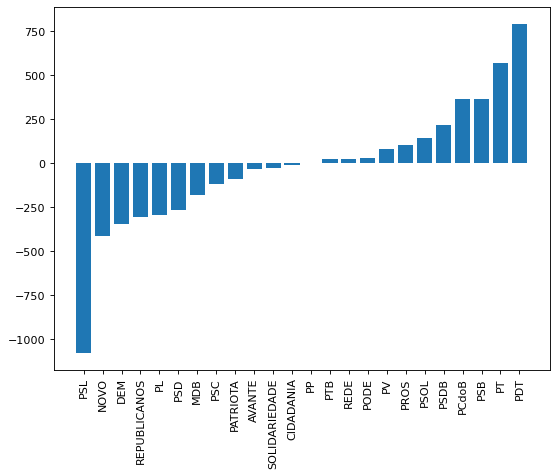

In [17]:
figure(figsize=(8, 6), dpi=80)
plt.xticks(rotation=90)
plt.bar(new_df["partido"], new_df["voto"])
plt.show()